# Exploration of synthetic dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from IPython.display import Image

from models.utils.model_utils import read_data

%matplotlib inline


In [2]:
def visualize_2d_data(data, max_users=None, comp1=0, comp2=1):
    fig = plt.figure(figsize=(12, 10))
    marker_size = None
    colors = ['C' + str(i % 10) for i in range(len(data))]
    for user, c in zip(data.keys(), colors):
        d = np.array(data[user]['x'])
        t = np.array(data[user]['y'])
        classA = d[t == 1]
        classB = d[t == 0]
        plt.scatter(classA[:, comp1], classA[:, comp2], s=marker_size, c=c, label='User {} (class 1)'.format(user))
        plt.scatter(classB[:, comp1], classB[:, comp2], marker='x', s=marker_size, c=c)
        print('User {} has {} datasets ({} of which are class 1).'.format(user, len(d), t.sum()))
        if max_users is not None and int(user) == max_users:
            print('Aborting after {} users...'.format(max_users))
            break
    plt.xlabel('Component ' + str(comp1))
    plt.ylabel('Component ' + str(comp2))
    plt.legend()
    
def convert_to_ndarray(data):
    num_users = [len(data[u]['x']) for u in data.keys()]
    cum_num_users = np.cumsum([0] + num_users)
    
    all_data_x = []
    all_data_y = []
    for u in data.keys():
        all_data_x.extend(data[u]['x'])
        all_data_y.extend(data[u]['y'])
        print('User {} has {} datasets ({} of which are class 1).'.format(
            u, len(data[u]['x']), sum(data[u]['y'])))
        
    X = np.array(all_data_x)
    Y = np.array(all_data_y)
    return X, Y, cum_num_users

def convert_to_dict(x, y, cum_num_users):
    data = {}
    for i, start_idx, end_idx in zip(np.arange(len(cum_num_users)), cum_num_users[:-1], cum_num_users[1:]):
        data[str(i)] = {'x': x[start_idx : end_idx], 'y': y[start_idx : end_idx]}
    return data


## Two-dimensional data
Create two-dimensional data with a shell command


For two-dimensional data, we can easily visualize the data distribution.


In [3]:
!cd data/synthetic && python main.py -num-tasks 5 -num-classes 2 -num-dim 2

data_dir = 'data/synthetic/data/all_data'
clients, groups, data, _ = read_data(data_dir, data_dir)


Generating dataset
Done :D


####################################
DATASET: synthetic
5 users
188 samples (total)
37.60 samples per user (mean)
num_samples (std): 29.25
num_samples (std/mean): 0.78
num_samples (skewness): 0.53
0 	 2
20 	 1
40 	 1
60 	 0
80 	 1
100 	 0
120 	 0
140 	 0
160 	 0
180 	 0


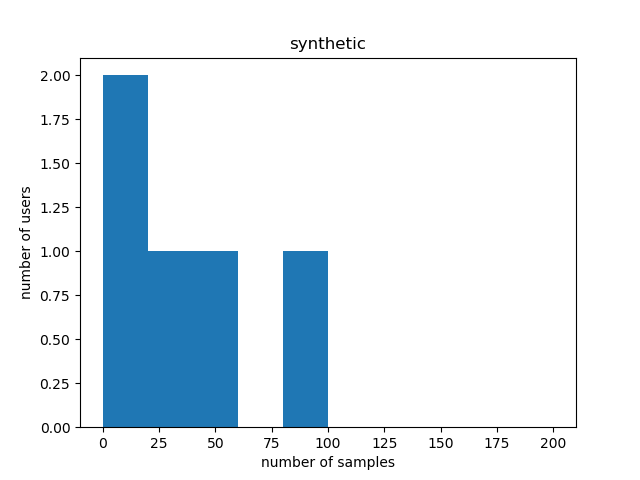

In [4]:
!cd data/utils && python3 stats.py --name synthetic

Image(filename='data/synthetic/data/synthetic_hist.png')


User 0 has 86 datasets (43 of which are class 1).
User 1 has 33 datasets (17 of which are class 1).
User 2 has 52 datasets (13 of which are class 1).
User 3 has 6 datasets (0 of which are class 1).
User 4 has 11 datasets (0 of which are class 1).


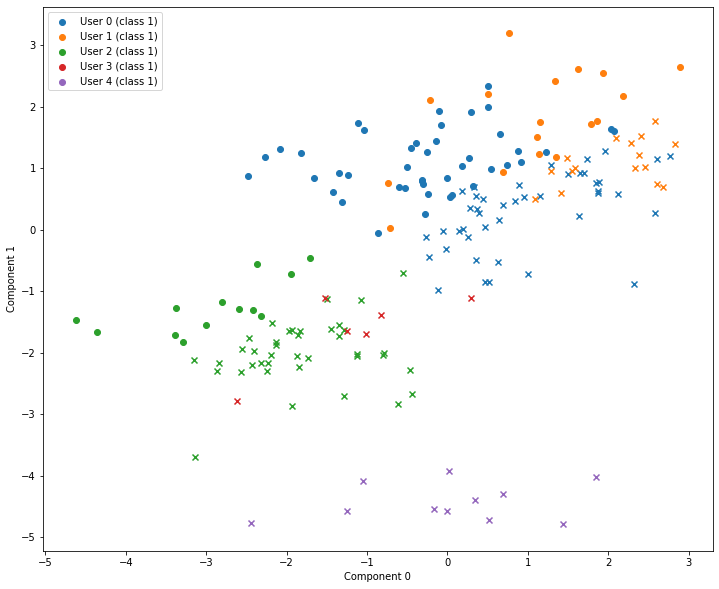

In [5]:
visualize_2d_data(data)


Each user data follows a Gaussian distribution with diagonal covariance matrix (variance of coordinate $\sigma_j = j^{-1.2}$.
See more details in arXiv:1905.10497, but the LEAF implementation differs slightly from my perspective.
The variable `prob_clusters` essentially determines how the labeling differs between users.
If there is only one "cluster", all users have the same matrix for label generation (up to some small amount of noise).
If `prob_clusters = [p1, p2, p3]`, for instance, there are three different labeling rules corresponding to different
labeling matrices and the users are assigned rule 1, 2 and 3 with probabilities `p1`, `p2` and `p3`, respectively.
This means that a single model can't achieve good performance for every user and simulates the need of personalization(?).

An example for multiple "clusters" can be produced by setting `PROB_CLUSTERS = [.5, .5]` in `main.py` and is depicted here:


In [8]:
!cd data/synthetic && python main.py -num-tasks 5 -num-classes 2 -num-dim 2
  
data_dir = 'data/synthetic/data/all_data'
clients, groups, data, _ = read_data(data_dir, data_dir)

Generating dataset
Done :D


User 0 has 86 datasets (78 of which are class 1).
User 1 has 33 datasets (8 of which are class 1).
User 2 has 52 datasets (52 of which are class 1).
User 3 has 6 datasets (2 of which are class 1).
User 4 has 11 datasets (9 of which are class 1).


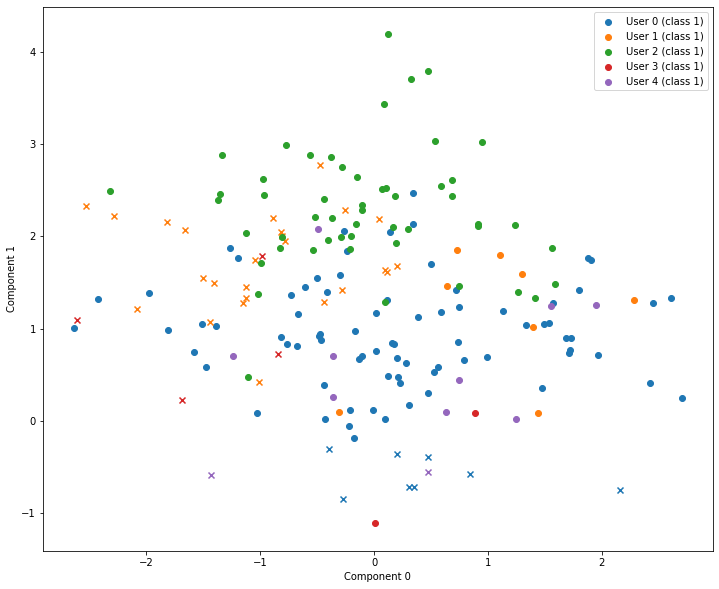

In [9]:
visualize_2d_data(data)

## Multi-dimensional data
Could try visualization with PCA or t-SNE?


In [10]:
!cd data/synthetic && python main.py -num-tasks 5 -num-classes 2 -num-dim 60 -seed 1866
  
data_dir = 'data/synthetic/data/all_data'
clients, groups, data, _ = read_data(data_dir, data_dir)


Generating dataset
Done :D


####################################
DATASET: synthetic
5 users
160 samples (total)
32.00 samples per user (mean)
num_samples (std): 29.79
num_samples (std/mean): 0.93
num_samples (skewness): 1.31
0 	 2
20 	 2
40 	 0
60 	 0
80 	 1
100 	 0
120 	 0
140 	 0
160 	 0
180 	 0


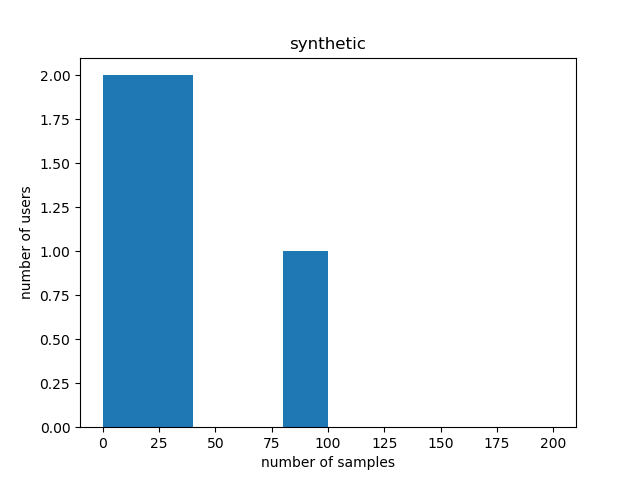

In [11]:
!cd data/utils && python3 stats.py --name synthetic

Image(filename='data/synthetic/data/synthetic_hist.png')

In [12]:
# prepare data for PCA
data_x, data_y, cum_num_users = convert_to_ndarray(data)

# # uncomment for inspection of a single user's data 
# user_id = 5
# data_x = data_x[cum_num_users[user_id - 1]:cum_num_users[user_id]]
# data_y = data_y[cum_num_users[user_id - 1]:cum_num_users[user_id]]
# cum_num_users = [0, data_x.shape[0]]

pca = PCA(n_components=3)
pca.fit(data_x)
x_red = pca.transform(data_x)

# convert back for visualization
data_red = convert_to_dict(x_red, data_y, cum_num_users)


User 0 has 8 datasets (8 of which are class 1).
User 1 has 90 datasets (0 of which are class 1).
User 2 has 28 datasets (24 of which are class 1).
User 3 has 21 datasets (21 of which are class 1).
User 4 has 13 datasets (7 of which are class 1).


User 0 has 8 datasets (8 of which are class 1).
User 1 has 90 datasets (0 of which are class 1).
User 2 has 28 datasets (24 of which are class 1).
User 3 has 21 datasets (21 of which are class 1).
User 4 has 13 datasets (7 of which are class 1).
User 0 has 8 datasets (8 of which are class 1).
User 1 has 90 datasets (0 of which are class 1).
User 2 has 28 datasets (24 of which are class 1).
User 3 has 21 datasets (21 of which are class 1).
User 4 has 13 datasets (7 of which are class 1).


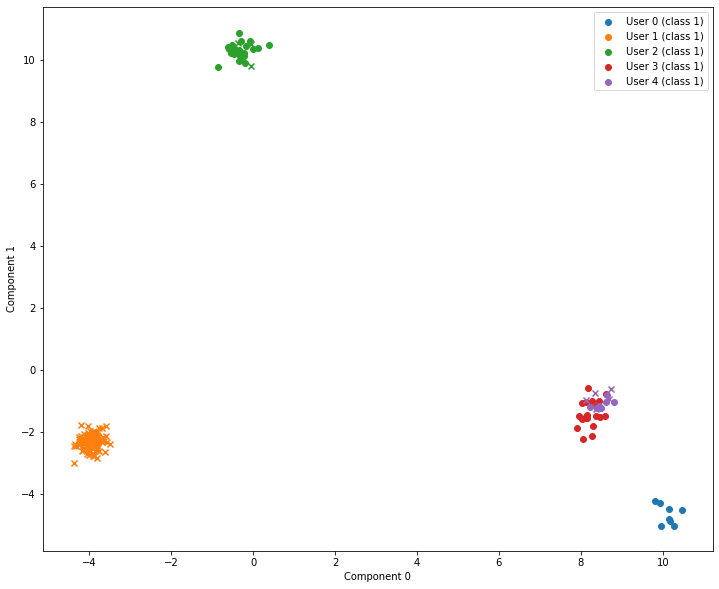

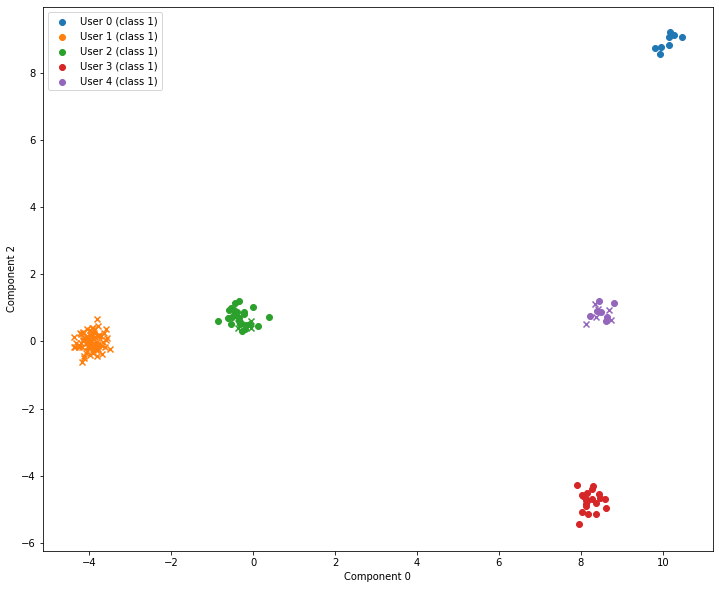

In [13]:
visualize_2d_data(data_red, comp1=0, comp2=1)
visualize_2d_data(data_red, comp1=0, comp2=2)


The PCA shows clear separation between user data clusters! What does this mean?
Compare that to projections onto the original data coordinates:


User 0 has 8 datasets (8 of which are class 1).
User 1 has 90 datasets (0 of which are class 1).
User 2 has 28 datasets (24 of which are class 1).
User 3 has 21 datasets (21 of which are class 1).
User 4 has 13 datasets (7 of which are class 1).
User 0 has 8 datasets (8 of which are class 1).
User 1 has 90 datasets (0 of which are class 1).
User 2 has 28 datasets (24 of which are class 1).
User 3 has 21 datasets (21 of which are class 1).
User 4 has 13 datasets (7 of which are class 1).
User 0 has 8 datasets (8 of which are class 1).
User 1 has 90 datasets (0 of which are class 1).
User 2 has 28 datasets (24 of which are class 1).
User 3 has 21 datasets (21 of which are class 1).
User 4 has 13 datasets (7 of which are class 1).


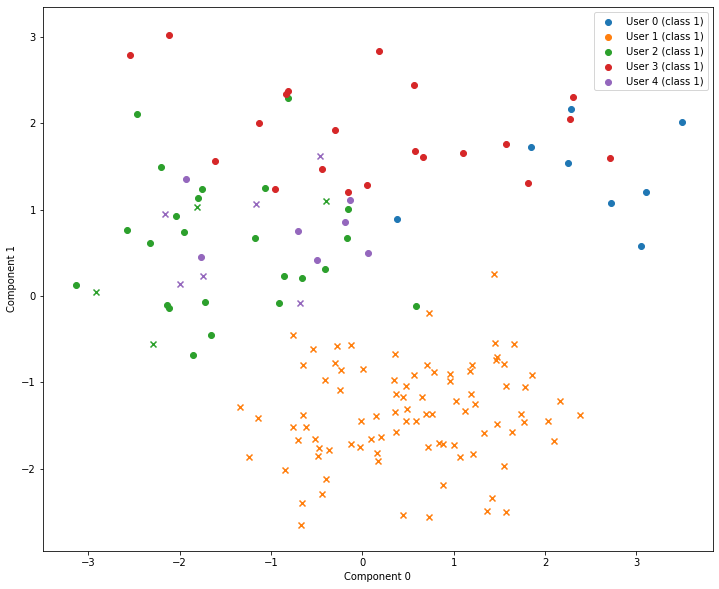

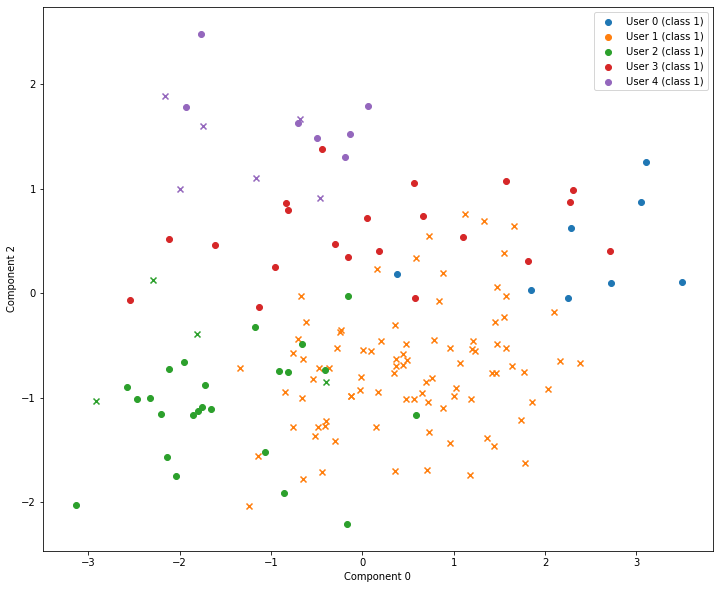

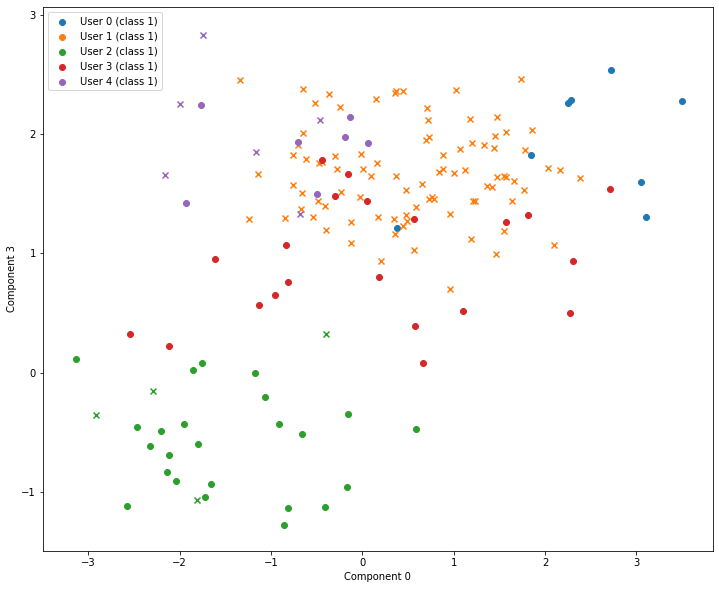

In [14]:
visualize_2d_data(data, comp1=0, comp2=1)
visualize_2d_data(data, comp1=0, comp2=2)
visualize_2d_data(data, comp1=0, comp2=3)

